# 판매 분석

In [1]:
!pip install pymysql > /dev/null
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving mysql.json to mysql.json


In [2]:
import json
with open(filename) as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [4]:
import db_module as dm

## 1. 월별 매출/이익

In [5]:
results = dm.get_monthly_data(config)
df = pd.DataFrame(results, columns=['월','매출','이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,5879400,621820
02,6017700,474600
03,7464600,662650
04,4621400,460590
05,5944700,499300
06,3000400,176800
07,6953200,522940
08,6082700,426000
09,5695600,625140


In [6]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]

In [7]:
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,5879400,6017700,7464600,4621400,5944700,3000400,6953200,6082700,5695600,6132000,5751100,5189700,68732500
이익,621820,474600,662650,460590,499300,176800,522940,426000,625140,589980,466820,279790,5806430


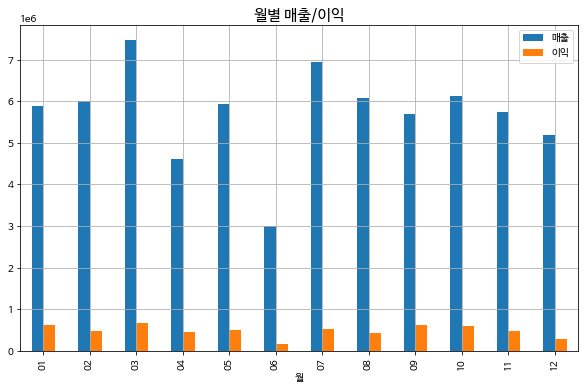

In [8]:
df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.grid()
plt.show()

## 2. 거래처별 매출/이익

In [9]:
# 소수점 자리 제한을 위한 코드
pd.options.display.float_format = '{:.2}'.format

In [10]:
results = dm.get_data_by_company(config)
df = pd.DataFrame(results, columns=['판매처','매출','이익'])
df.set_index('판매처', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
판매처,,,
한경아카데미,21124800,1772910,8.4
표준협회,14417900,1240320,8.6
테크브루,14254700,1272430,8.9
생산성본부,10291400,859400,8.4
멀티캠퍼스,8643700,661370,7.7


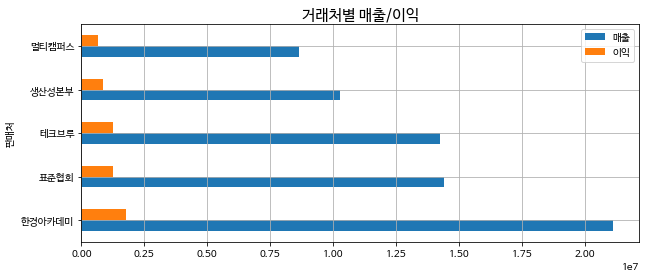

In [13]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 매출/이익', size=15)
plt.grid()
plt.show()

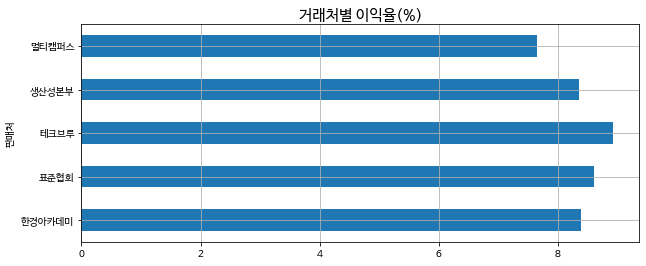

In [ ]:
df['이익율'].plot.barh(rot=0, figsize=(10,4))
plt.title('거래처별 이익율(%)', size=15)
plt.grid()
plt.show()

## 3. 거래처별 판매상품 및 수량

In [14]:
results = dm.get_products_by_company(config)
df = pd.DataFrame(results, columns=['판매처','상품','수량'])
df.set_index(['판매처','상품'], inplace=True)
df['수량'] = df.수량.astype(int)
df

수량
판매처    상품        
멀티캠퍼스  거꾸리      8
       내비게이션    2
       매트       2
       보조배터리   27
       복근운동기구  35
...            ..
한경아카데미 트램펄린    14
       하이패스    27
       핸즈프리    19
       헬스사이클    4
       후방카메라   34

[76 rows x 1 columns]

In [15]:
df.reset_index()['판매처'].unique()

array(['멀티캠퍼스', '생산성본부', '테크브루', '표준협회', '한경아카데미'], dtype=object)

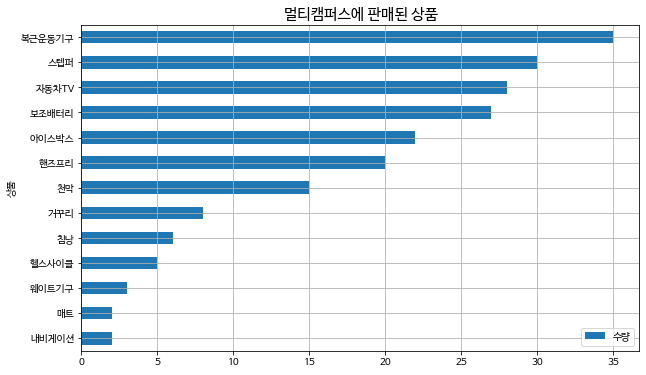

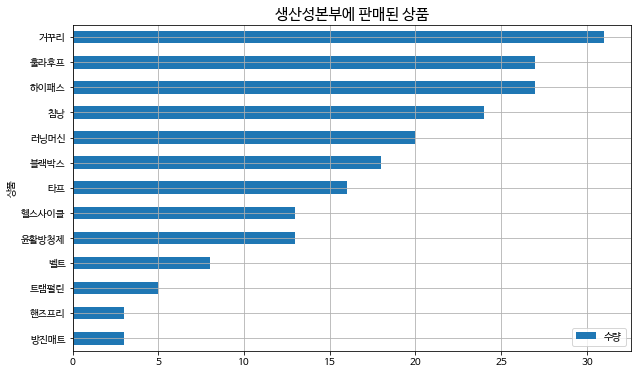

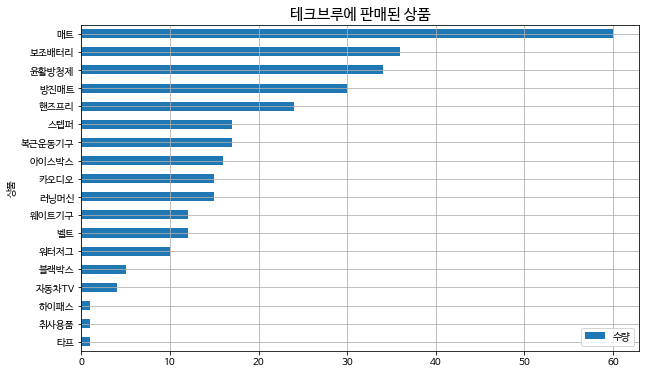

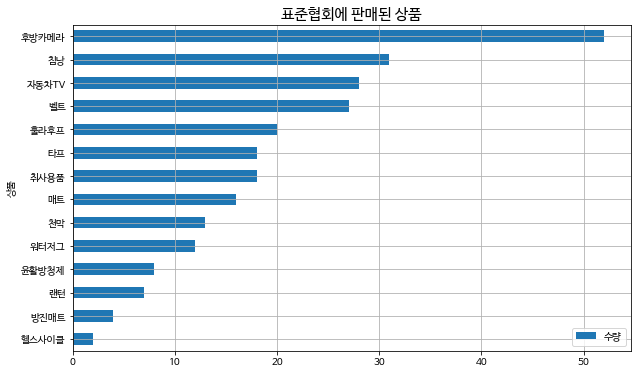

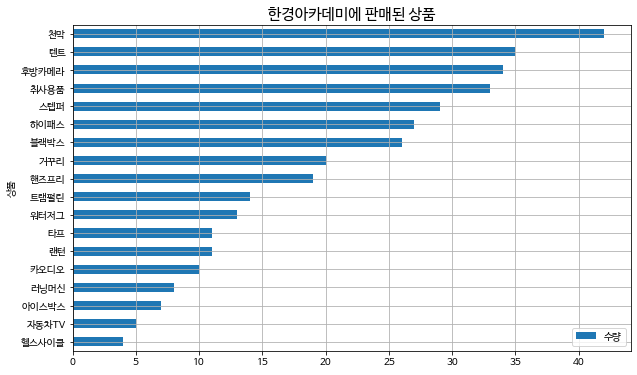

In [16]:
for company in df.reset_index()['판매처'].unique():
    sdf=df.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

## 4. 제품별 판매수량/매출/이익

In [17]:
results = dm.get_data_by_products(config)
df = pd.DataFrame(results, columns=['상품','수량','매출','이익'])
df.set_index('상품', inplace=True)
df['수량'] = df.수량.astype(int)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,수량,매출,이익
상품,,,
텐트,35,3321500,498400
타프,46,3960600,554300
천막,70,5523000,221200
침낭,61,4026000,442860
매트,78,1185600,82680
랜턴,18,1702800,85140
취사용품,52,3005600,420680
아이스박스,45,1368000,81900
보조배터리,63,4725000,378000


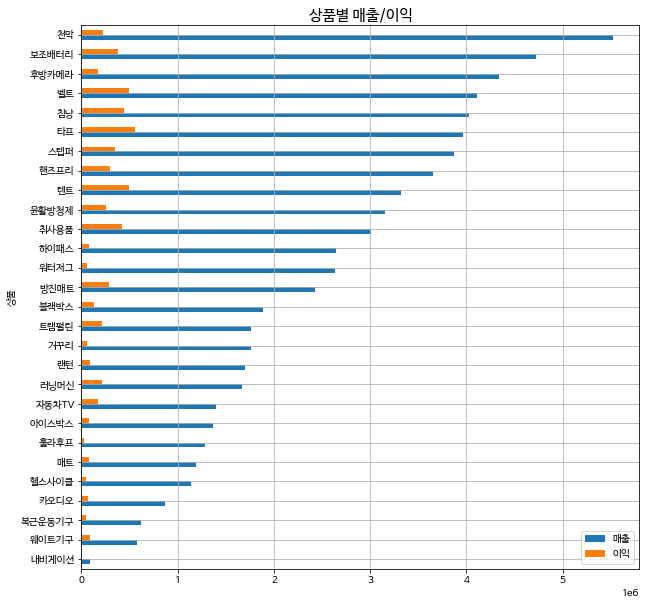

In [ ]:
df[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title('상품별 매출/이익', size=15)
plt.grid()
plt.show()

## 5. 카테고리별 매출/이익

In [18]:
results = dm.get_data_by_category(config)
df = pd.DataFrame(results, columns=['카테고리','매출','이익'])
df.set_index('카테고리', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df['이익율'] = df.이익 / df.매출 * 100
df

,매출,이익,이익율
카테고리,,,
캠핑용품,31453600,2818010,9.0
자동차용품,20458100,1461850,7.1
헬스용품,16820800,1526570,9.1


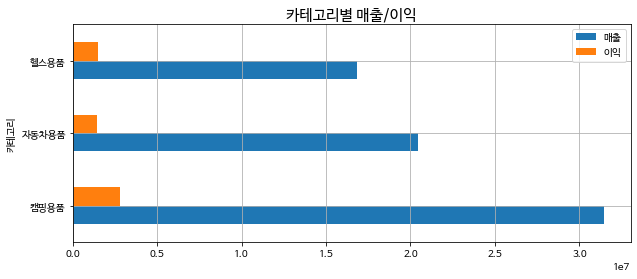

In [19]:
df[['매출','이익']].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 매출/이익', size=15)
plt.grid()
plt.show()

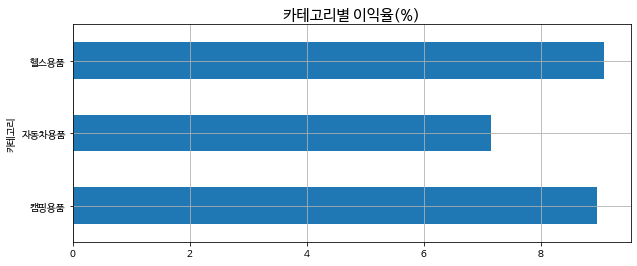

In [20]:
df['이익율'].plot.barh(rot=0, figsize=(10,4))
plt.title('카테고리별 이익율(%)', size=15)
plt.grid()
plt.show()